In [16]:
import datetime as dt
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

In [17]:
# Set date range
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*5)
print(f"Start date: {startDate}")
print(f"End date: {endDate}")

Start date: 2020-07-29 19:27:25.721079
End date: 2025-07-28 19:27:25.721079


In [18]:
# Define stocks
stocks = ["msft", "aapl", "googl", "amzn", "meta"]


In [27]:
# Download data (with auto_adjust=True by default)
df = yf.download(stocks, start=startDate, end=endDate)
print("\nDataFrame head:")
print(df.head())

[*********************100%***********************]  5 of 5 completed


DataFrame head:
Price            Close                                                 \
Ticker            AAPL        AMZN      GOOGL        META        MSFT   
Date                                                                    
2020-07-29   92.385452  151.676498  75.721367  232.017136  195.506958   
2020-07-30   93.503319  152.593994  76.459953  233.220551  195.353638   
2020-07-31  103.292038  158.233994  73.953972  252.285934  196.417130   
2020-08-03  105.894775  155.594498  73.696014  250.585281  207.463852   
2020-08-04  106.601952  156.941498  73.225838  248.466904  204.350113   

Price             High                                                 ...  \
Ticker            AAPL        AMZN      GOOGL        META        MSFT  ...   
Date                                                                   ...   
2020-07-29   92.570148  151.957993  76.209437  232.424902  196.072225  ...   
2020-07-30   93.607814  154.600006  76.585202  233.608422  195.890178  ...   
2020-07-

In [20]:
# Extract close prices
close_prices = df["Close"]

In [21]:
# Method 1: Log returns approach
logReturns = np.log(close_prices / close_prices.shift(1))
print("\nLog returns head:")
print(logReturns.head())


Log returns head:
Ticker          AAPL      AMZN     GOOGL      META      MSFT
Date                                                        
2020-07-29       NaN       NaN       NaN       NaN       NaN
2020-07-30  0.012028  0.006031  0.009707  0.005173 -0.000784
2020-07-31  0.099563  0.036294 -0.033324  0.078579  0.005429
2020-08-03  0.024885 -0.016822 -0.003494 -0.006764  0.054716
2020-08-04  0.006656  0.008620 -0.006400 -0.008490 -0.015123


In [22]:
# For log returns, we accumulate by summing them
# and then exponentiating to get the cumulative return
cumulativeLogReturns = logReturns.cumsum()
accumulatedReturns = np.exp(cumulativeLogReturns) - 1  # Convert to percentage gain/loss
print("\nAccumulated returns head (from log returns):")
print(accumulatedReturns.head())


Accumulated returns head (from log returns):
Ticker          AAPL      AMZN     GOOGL      META      MSFT
Date                                                        
2020-07-29       NaN       NaN       NaN       NaN       NaN
2020-07-30  0.012100  0.006049  0.009754  0.005187 -0.000784
2020-07-31  0.118056  0.043233 -0.023341  0.087359  0.004656
2020-08-03  0.146228  0.025831 -0.026747  0.080029  0.061158
2020-08-04  0.153883  0.034712 -0.032957  0.070899  0.045232


In [23]:
# Method 2: Simple returns approach (alternative)
# This is a more direct way if you want to use simple returns
simpleReturns = close_prices.pct_change()
accumulatedSimpleReturns = (1 + simpleReturns).cumprod() - 1
print("\nAccumulated returns head (from simple returns):")
print(accumulatedSimpleReturns.head())


Accumulated returns head (from simple returns):
Ticker          AAPL      AMZN     GOOGL      META      MSFT
Date                                                        
2020-07-29       NaN       NaN       NaN       NaN       NaN
2020-07-30  0.012100  0.006049  0.009754  0.005187 -0.000784
2020-07-31  0.118056  0.043233 -0.023341  0.087359  0.004656
2020-08-03  0.146228  0.025831 -0.026747  0.080029  0.061158
2020-08-04  0.153883  0.034712 -0.032957  0.070899  0.045232


<Figure size 1200x600 with 0 Axes>

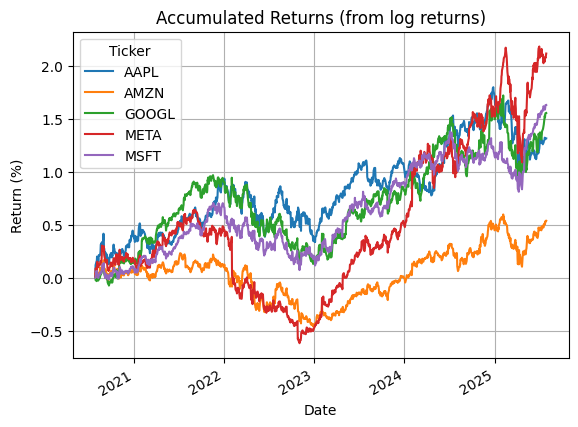

In [24]:
# Plot the accumulated returns from log returns
plt.figure(figsize=(12, 6))
accumulatedReturns.plot(title="Accumulated Returns (from log returns)")
plt.grid(True)
plt.ylabel("Return (%)")
plt.show()

<Figure size 1200x600 with 0 Axes>

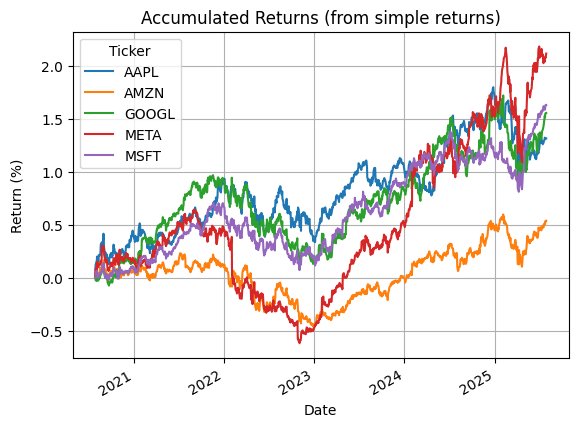

In [25]:
# Optional: Plot the accumulated returns from simple returns
plt.figure(figsize=(12, 6))
accumulatedSimpleReturns.plot(title="Accumulated Returns (from simple returns)")
plt.grid(True)
plt.ylabel("Return (%)")
plt.show()